In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [ ]:
df=pd.read_csv('covid_19_india.csv')
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,1/2/2020,6:00 PM,Kerala,2,0,0,0,2
3,4,2/2/2020,6:00 PM,Kerala,3,0,0,0,3
4,5,3/2/2020,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
3346,3347,22/06/20,8:00 AM,Tripura,-,-,782,1,1237
3347,3348,22/06/20,8:00 AM,Uttarakhand,-,-,1521,28,2402
3348,3349,22/06/20,8:00 AM,Uttar Pradesh,-,-,11601,569,18322
3349,3350,22/06/20,8:00 AM,West Bengal,-,-,8687,569,14358


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       3351 non-null   int64 
 1   Date                      3351 non-null   object
 2   Time                      3351 non-null   object
 3   State/UnionTerritory      3351 non-null   object
 4   ConfirmedIndianNational   3351 non-null   object
 5   ConfirmedForeignNational  3351 non-null   object
 6   Cured                     3351 non-null   int64 
 7   Deaths                    3351 non-null   int64 
 8   Confirmed                 3351 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 235.7+ KB


In [ ]:
df.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [ ]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,3351.000000,3351.000000,3351.000000,3351.000000
mean,1676.000000,1432.521635,93.457774,3090.470307
std,967.494703,5085.838368,407.541084,10470.065534
min,1.000000,0.000000,0.000000,0.000000
25%,838.500000,1.000000,0.000000,15.000000
50%,1676.000000,33.000000,1.000000,156.000000
75%,2513.500000,568.000000,24.000000,1810.000000
max,3351.000000,67706.000000,6283.000000,135796.000000


In [ ]:
#droping unwanted columns
df=df.drop(columns=['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'])

In [ ]:
#changing datatypes
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df['Date']

In [ ]:
#spelling check
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana'],
      dtype=object)

In [ ]:
df['State/UnionTerritory']=df['State/UnionTerritory'].replace(['Telengana'],['Telangana'])

In [ ]:
#checking null values
df.isnull().sum()

Date                    0
State/UnionTerritory    0
Cured                   0
Deaths                  0
Confirmed               0
dtype: int64

In [ ]:
#creating new feature
df['Active cases']=df['Confirmed']-(df['Cured']+df['Deaths'])
df.tail(3)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active cases
3348,2020-06-22,Uttar Pradesh,11601,569,18322,6152
3349,2020-06-22,West Bengal,8687,569,14358,5102
3350,2020-06-22,Cases being reassigned to states,0,0,8015,8015


In [ ]:
#creating pivot table (summing all death,confirmed,cured cases for each state)
df_pivot=pd.pivot_table(df,values=['Confirmed','Deaths','Cured'],index='State/UnionTerritory', aggfunc= max)
#df_pivot

In [ ]:
df_pivot['Recovery_rate']=df_pivot['Cured']*100/df_pivot['Confirmed']
#df_pivot['Recovery_rate']

In [ ]:
df_pivot['Death_rate']=df_pivot['Deaths']*100/df_pivot['Confirmed']

In [ ]:
df_pivot=df_pivot.sort_values(by='Confirmed',ascending=False) #sorting the order of values depends on confirmed cases by desending

In [ ]:
df_pivot.style.background_gradient(cmap='OrRd')#plotting with cmap

,Confirmed,Cured,Deaths,Recovery_rate,Death_rate
State/UnionTerritory,,,,,
Maharashtra,135796,67706,6283,49.858611,4.626793
Delhi,62655,36602,2233,58.418323,3.563961
Tamil Nadu,62087,34112,794,54.942258,1.278851
Gujarat,27825,19909,1684,71.550764,6.052111
Uttar Pradesh,18322,11601,569,63.317323,3.105556
Rajasthan,15232,11910,356,78.190651,2.337185
West Bengal,14358,8687,569,60.502856,3.962947
Madhya Pradesh,12078,9215,521,76.295744,4.313628
Haryana,11025,5916,169,53.659864,1.532880


In [ ]:
#Top 10 states having active cases 
Top_10=df.groupby(by='State/UnionTerritory').max()[['Active cases','Date']].sort_values(by=['Active cases'],ascending=False).reset_index()
#Top_10

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

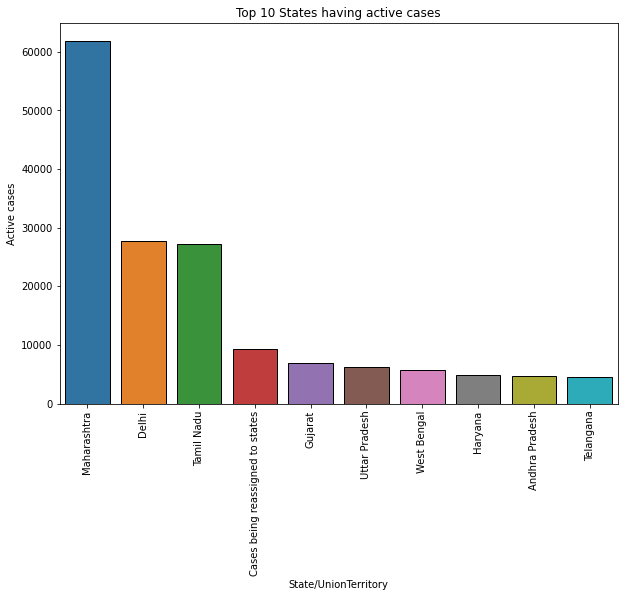

In [ ]:
plt.figure(figsize=(10,7))
top10=sns.barplot(data=Top_10.iloc[:10],y="Active cases",x="State/UnionTerritory",edgecolor='black')
plt.title('Top 10 States having active cases')
plt.xticks(rotation='vertical')

From the above bar plot we able to analyse that maharashtra has the highest covid active cases in India.

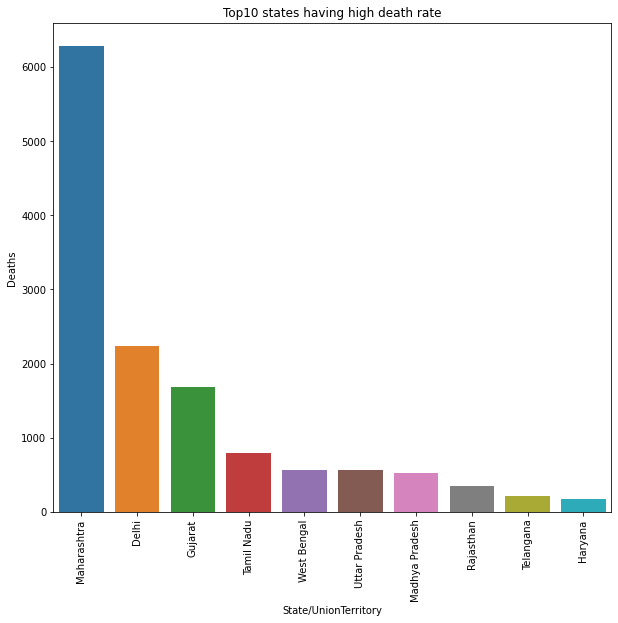

In [ ]:
#top 10 death cases by state wise
top10_deathrate=df.groupby(by='State/UnionTerritory').max()[['Deaths','Date']].sort_values(by='Deaths',ascending=False).reset_index()
plt.figure(figsize=(10,9))
deathrate=sns.barplot(data=top10_deathrate.iloc[:10],x="State/UnionTerritory",y="Deaths")
plt.title('Top10 states having high death rate')
plt.xticks(rotation='vertical')
plt.show()

Maharashtra has the high mortality rate.

Text(0.5, 1.0, 'Evaluation of cases according to states')

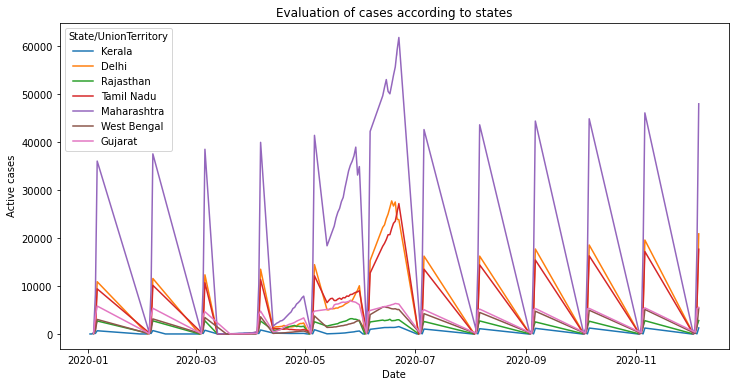

In [ ]:
#Evaluation trend
plt.figure(figsize=(12,6))
Evaluation=sns.lineplot(data=df[df['State/UnionTerritory'].isin(['Maharashtra','Gujarat','Kerala','Tamil Nadu','West Bengal','Rajasthan','Delhi'])], x='Date',y='Active cases',hue='State/UnionTerritory')
plt.title('Evaluation of cases according to states')

Between may to july cases rises to peak then decreases .

In [ ]:
sns.pairplot(df)#look relationship between entire dataset

In [2]:
vaccine=pd.read_csv('covid_vaccine_statewise.csv')
vaccine

,Updated On,State,Total Doses Administered,First Dose Administered,Second Dose Administered
0,16/01/2021,India,48276.0,48276.0,0.0
1,17/01/2021,India,58604.0,58604.0,0.0
2,18/01/2021,India,99449.0,99449.0,0.0
3,19/01/2021,India,195525.0,195525.0,0.0
4,20/01/2021,India,251280.0,251280.0,0.0
...,...,...,...,...,...
6694,11/7/2021,West Bengal,NaN,NaN,NaN
6695,12/7/2021,West Bengal,NaN,NaN,NaN
6696,13/07/2021,West Bengal,NaN,NaN,NaN
6697,14/07/2021,West Bengal,NaN,NaN,NaN


In [ ]:
vaccine.isnull().sum()

Updated On                    0
State                         0
Total Doses Administered    335
First Dose Administered     336
Second Dose Administered    336
dtype: int64

In [3]:
vaccine=vaccine.dropna()

In [ ]:
vaccine.State.unique()

array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [ ]:
vaccine.rename(columns={'Updated On':'vaccine_date'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
vaccine.dtypes

vaccine_date                 object
State                        object
Total Doses Administered    float64
First Dose Administered     float64
Second Dose Administered    float64
dtype: object

In [ ]:
vaccine['vaccine_date']=pd.to_datetime(vaccine['vaccine_date'])

In [ ]:
#first dose VS second dose
first=vaccine['First Dose Administered'].sum()
second=vaccine['Second Dose Administered'].sum()
px.pie(names=["First","Second"],values=[first,second],title='First Dose VS Second Dose',color_discrete_sequence=px.colors.sequential.RdBu)

Majority of people completed their First dose.

In [6]:
#removing columns where state mentioned as india
vaccine_df=vaccine[vaccine.State!='India'].reset_index()
vaccine_df=vaccine_df.drop(columns=['index'])
vaccine_df

,Updated On,State,Total Doses Administered,First Dose Administered,Second Dose Administered
0,16/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0
1,17/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0
2,18/01/2021,Andaman and Nicobar Islands,42.0,42.0,0.0
3,19/01/2021,Andaman and Nicobar Islands,89.0,89.0,0.0
4,20/01/2021,Andaman and Nicobar Islands,124.0,124.0,0.0
...,...,...,...,...,...
6186,2/7/2021,West Bengal,22319689.0,17019095.0,5300594.0
6187,3/7/2021,West Bengal,22591117.0,17135494.0,5455623.0
6188,4/7/2021,West Bengal,22660276.0,17165989.0,5494287.0
6189,5/7/2021,West Bengal,22960000.0,17285927.0,5674073.0


In [8]:
#most vaccinated state
state_max=vaccine_df.groupby('State')['Total Doses Administered'].sum().to_frame('Total Doses Administered')
state_max=state_max.sort_values('Total Doses Administered',ascending=False)
state_max

,Total Doses Administered
State,
Maharashtra,2.093453e+09
Uttar Pradesh,1.836649e+09
Gujarat,1.665840e+09
Rajasthan,1.663653e+09
West Bengal,1.443061e+09
Karnataka,1.322772e+09
Madhya Pradesh,1.149552e+09
Bihar,9.818519e+08
Kerala,9.340502e+08


Maharashtra has the highest Total Doses Administered.

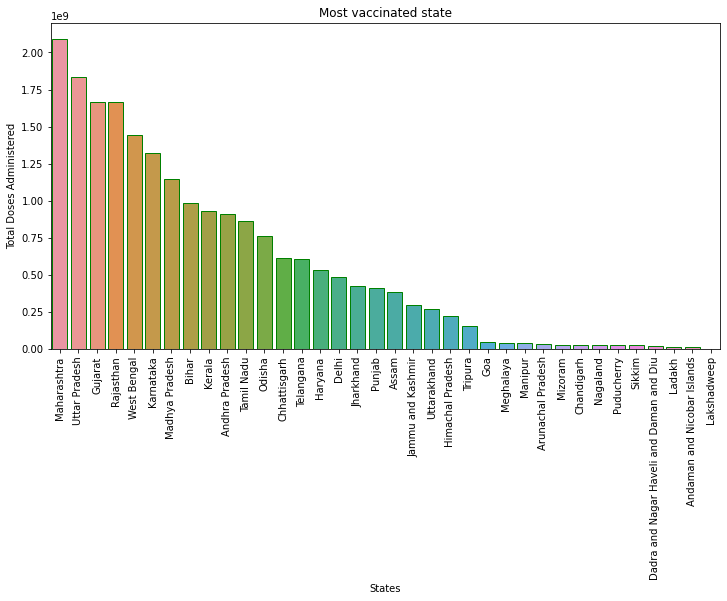

In [13]:
#barplot
plt.figure(figsize=(12,6))
plt.title('Most vaccinated state')
x=sns.barplot(data=state_max,x=state_max.index,y=state_max['Total Doses Administered'],edgecolor='green')
plt.xticks(rotation='vertical')
plt.xlabel('States')
plt.ylabel('Total Doses Administered')
plt.show()

Maharashtra has vaccinated highly and lakshadweep has very least vaccinated people.

In [15]:
state_min=vaccine_df.groupby('State')['Total Doses Administered'].sum().to_frame('Total Doses Administered')
state_min=state_max.sort_values('Total Doses Administered',ascending=True)[:5]
state_min

,Total Doses Administered
State,
Lakshadweep,3261957.0
Andaman and Nicobar Islands,11328986.0
Ladakh,14771706.0
Dadra and Nagar Haveli and Daman and Diu,18260124.0
Sikkim,25897087.0


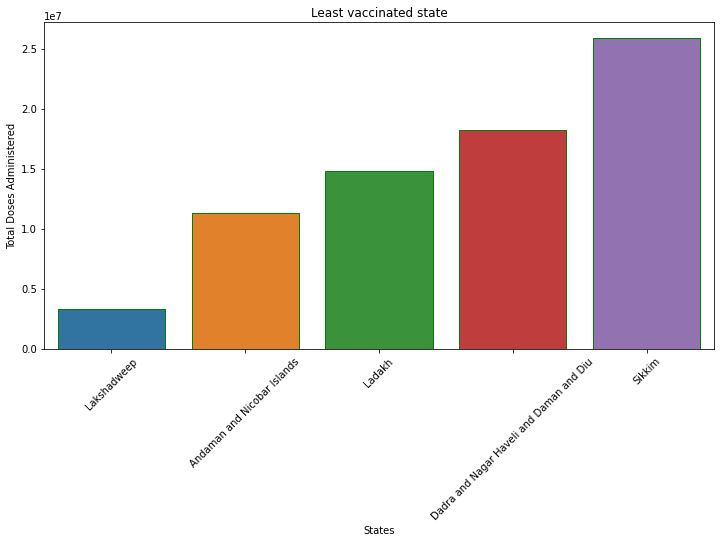

In [17]:
plt.figure(figsize=(12,6))
plt.title('Least vaccinated state')
x=sns.barplot(data=state_min,x=state_min.index,y=state_min['Total Doses Administered'],edgecolor='green')
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('Total Doses Administered')
plt.show()

Lakshadweep has the least vaccination.